In [49]:
fname="trainingSubset0029.nc"
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

with nc.Dataset(fname) as f:
    sfcPrecip=f.variables['sfcPrecip'][:]
    sfcPrecipKu=f.variables['sfcPrecipKu'][:]
    stormTop=f.variables['stormTop'][:]
    dbzku_zero=f.variables['dbzku_zero'][:]
    dbzku_rain=f.variables['dbzku_rain'][:]
    dbzku_ice=f.variables['dbzku_ice'][:]
    dbzka_zero=f.variables['dbzka_zero'][:]
    hzero=f.variables['hzero'][:]
    pia=f.variables['pia'][:,:,:,0]
    pType=f.variables['pType'][:]
    sigmaZero=f.variables['sigmaZero'][:]
    landSurface=f.variables['landSurface'][:]
    elevation=f.variables['elevation'][:]
    localZenithAngle=f.variables['localZenithAngle'][:]
    zeta=f.variables['zeta'][:]
    PIAhybrid=f.variables['PIAhyb'][:]
    PIAhybridKu=f.variables['PIAhybKu'][:]

In [50]:
print(PIAhybrid.shape)
a=np.nonzero(pType>0)
b=np.nonzero(PIAhybridKu[:,:,:][a]>-3)
print(np.corrcoef(PIAhybridKu[a][b],PIAhybrid[:,:,:,0][a][b]))
print(np.corrcoef(sfcPrecip[a][b],sfcPrecipKu[a][b]))
PIAhybrid[PIAhybrid<0]=0
print(zeta.max())

(164241, 16, 8, 2)
[[1.         0.62806073]
 [0.62806073 1.        ]]
[[1.         0.48009897]
 [0.48009897 1.        ]]
5.9729934


In [ ]:
from matplotlib.colors import LogNorm
ax=plt.subplot(111)
correctionCoeffs=[ 0.71249596, -0.34915071,  0.37135569]
dsrtPIA=PIAhybrid[:,:,:,0][a][b]
dsrtPIA_corrected=dsrtPIA.copy()
c=np.nonzero(dsrtPIA>1.5)
dsrtPIA_corrected[c]=correctionCoeffs[0]*dsrtPIA[c]**2+correctionCoeffs[1]*dsrtPIA[c]+correctionCoeffs[2]
h1d=plt.hist2d(PIAhybridKu[a][b],dsrtPIA_corrected,bins=np.arange(100)*0.1,norm=LogNorm(),cmap='jet')
plt.colorbar(h1d[3])
ax.set_aspect('equal')
plt.hist(PIAhybridKu[a][b],bins=np.arange(100)*0.1)
plt.hist(PIAhybrid[:,:,:,0][a][b],bins=np.arange(100)*0.1)
# calculated the cdf of the PIAhybridKu and PIAhybrid
cdfKu=np.zeros(100)
cdfKa=np.zeros(100)
for i in range(100):
    cdfKu[i]=np.sum(PIAhybridKu[a][b]<i*0.1)
    cdfKa[i]=np.sum(PIAhybrid[:,:,:,0][a][b]<i*0.1)
plt.figure()

#plt.plot(cdfKu/np.max(cdfKu))
#plt.plot(cdfKa/np.max(cdfKa))
pia1=PIAhybrid[:,:,:,0][a][b]
pia2=PIAhybridKu[a][b]
pia1s=np.sort(pia1)
pia2s=np.sort(pia2)
n=int(len(pia1s)/20)
plt.plot(pia1s[5*n::n],pia2s[5*n::n],'-')
plt.ylim(0,35)
plt.xlim(0,35)
x1=pia1s[5*n::n]
y1=pia2s[5*n::n]
correctionCoeff=np.polyfit(x1,y1,2)
y2_fit=correctionCoeff[0]*x1**2+correctionCoeff[1]*x1+correctionCoeff[2]
plt.plot(x1,y2_fit,'r-')
plt.plot(x1,y1,'k-')
print(correctionCoeff)

17.761032
14.447849
12.62172
324 0
41.036846 -50.735973
(164241, 16, 8)
(164241, 16, 8, 2)
(164241, 16, 8, 2)


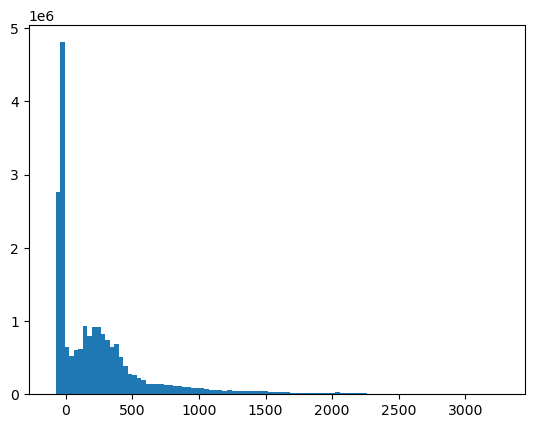

In [51]:
dbzku_rain[dbzku_rain<0]=0
dbzku_ice[dbzku_ice<0]=0
dbzku_zero[dbzku_zero<0]=0
dbzka_zero[dbzka_zero<0]=0
print(dbzku_rain.mean())
print(dbzku_ice.mean())
print(dbzku_zero.std())
print(landSurface.max(),landSurface.min())
print(sigmaZero.max(),sigmaZero.min()) 
hElv=plt.hist(elevation.flatten(),bins=100)
print(elevation.shape)
print(localZenithAngle.shape)
print(sigmaZero.shape)

In [73]:
print(stormTop.min())
stormTop[stormTop<0]=0
print(hzero.min())
print(pia.min())
print(sfcPrecip.min())
print(pType.min())

#xL=np.stack([(dbzku_rain-12)/12,(dbzku_ice-12)/12,(dbzku_zero-12),(dbzka_zero-12),hzero/3e3,np.log10(1+pia/0.1),(stormTop-3000)/1e3],axis=-1)
#xL=np.stack([(dbzku_rain-12)/12,(dbzku_ice-12)/12,(dbzku_zero-12),hzero/3e3,(stormTop-3000)/1e3,landSurface/100.,elevation/1000,sigmaZero[:,:,:,0]/20.0,sigmaZero[:,:,:,1]/20.0,localZenithAngle[:,:,:,0]/17,zeta[:,:,:]],axis=-1)
xL=np.stack([(dbzku_rain-12)/12,(dbzku_ice-12)/12,(dbzku_zero-12),hzero/3e3,(stormTop-3000)/1e3,landSurface/100.,elevation/1000,sigmaZero[:,:,:,0]/20.0,localZenithAngle[:,:,:,0]/17,zeta[:,:,:]],axis=-1)

0.0
1381.6394
-0.0
0.0
0


In [78]:
print(xL.shape)
xL_scaled=np.swapaxes(xL,-2,-1)
xL_scaled=np.swapaxes(xL_scaled,-2,-3)
print(xL_scaled.shape)
yL_scaled1=np.log10(1+PIAhybrid[:,:,:,0]/0.1)
yL_scaled1=yL_scaled1[:,np.newaxis,:,:]
yL_scaled2=np.log10(1+PIAhybrid[:,:,:,1]/0.1)
yL_scaled2=yL_scaled2[:,np.newaxis,:,:]
yL_scaled3=np.log10(1+sfcPrecip/0.1)
yL_scaled3=yL_scaled3[:,np.newaxis,:,:]
yL_scaled=np.concatenate([yL_scaled1,yL_scaled2,yL_scaled3],axis=1)
print(yL_scaled.shape)

(164241, 16, 8, 10)
(164241, 10, 16, 8)
(164241, 3, 16, 8)


In [111]:
from neuralop.models import FNO

model_noKa = FNO(n_modes=(8, 8), hidden_channels=64,
                in_channels=10, out_channels=3)

In [79]:
from sklearn.model_selection import train_test_split
nt=xL_scaled.shape[0]
ntrain=int(0.8*nt)
x_train=xL_scaled[:ntrain]
x_test=xL_scaled[ntrain:]
y_train=yL_scaled[:ntrain]
y_test=yL_scaled[ntrain:]
#x_train, x_test, y_train, y_test = train_test_split(xL_scaled, yL_scaled, test_size=0.2, random_state=42)
print(x_train.shape)    

(131392, 10, 16, 8)


In [81]:
from torch.utils.data import Dataset, DataLoader
import torch
class CustomDataset(Dataset):
    def __init__(self, x_train, y_train, transform=None):
        self.x_train = torch.tensor(x_train, dtype=torch.float32)
        self.y_train = torch.tensor(y_train, dtype=torch.float32)
        self.transform = transform

    def __len__(self):
        return len(self.x_train)

    def __getitem__(self, idx):
        sample = self.x_train[idx], self.y_train[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample

# Define any transformations if necessary
# Example of transformation
# transform = transforms.Compose([
#     transforms.ToTensor(),
# ])

# Create custom dataset
# Pass transform if any
# train_dataset = CustomDataset(x_train, y_train, transform=transform)
train_dataset = CustomDataset(x_train, y_train)

# Define DataLoader
batch_size = 64
shuffle = True
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)

In [112]:
#train the model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable

model=model_noKa

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [103]:
print(sfcPrecip.min())

0.0


In [113]:

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        # Compute loss
        loss = criterion(outputs, labels)  # Assuming images are flattened to 1D
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

print('Finished Training')

In [105]:
y_pred=model(torch.tensor(x_test, dtype=torch.float32))

In [106]:
mse=criterion(y_pred,torch.tensor(y_test, dtype=torch.float32))
print(mse)
print(np.corrcoef(y_pred.detach().numpy().flatten(),y_test.flatten()))
print(y_pred.shape)
# save full model
torch.save(model, "sigmaZeroModel_15iterations_zeta_SF_3channels.pt")

tensor(0.0319, grad_fn=<MseLossBackward0>)
[[1.         0.96517028]
 [0.96517028 1.        ]]
torch.Size([32849, 3, 16, 8])


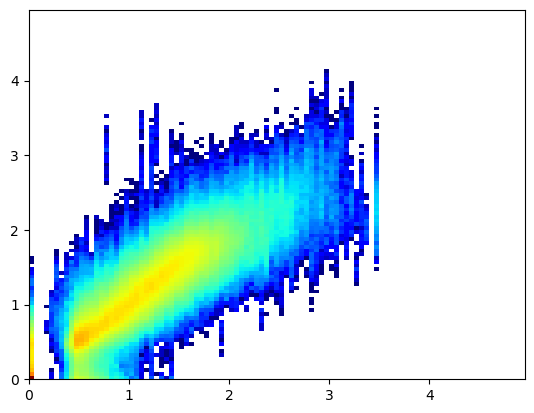

In [107]:
y_pred_np=y_pred.detach().numpy()
import matplotlib 
h2d=plt.hist2d(y_test[:,2,4:-4,:].flatten(),y_pred_np[:,2,4:-4,:].flatten(),bins=np.arange(100)*0.05,norm=matplotlib.colors.LogNorm(),cmap='jet')


[[1.         0.88099874]
 [0.88099874 1.        ]]
0.5682802 0.5788305


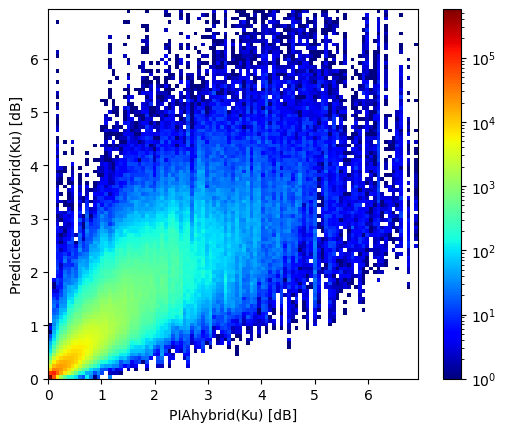

In [108]:
sfcRain_pred=0.1*(10**(y_pred_np)[:,0,4:-4,:]-1)
sfcRain_test=0.1*(10**(y_test)[:,0,4:-4,:]-1)
print(np.corrcoef(sfcRain_pred.flatten(),sfcRain_test.flatten()))
ax=plt.figure()
h2d_rain=plt.hist2d(sfcRain_test.flatten(),sfcRain_pred.flatten(),bins=np.arange(100)*0.07,norm=matplotlib.colors.LogNorm(),cmap='jet')
#set aspect ratio to be equal
ax.gca().set_aspect('equal', adjustable='box')
#ax.set_aspect('equal')
print(sfcRain_pred.mean(),sfcRain_test.mean())
plt.ylabel('Predicted PIAhybrid(Ku) [dB]')
plt.xlabel('PIAhybrid(Ku) [dB]')
plt.colorbar(h2d_rain[3])
plt.savefig('PIAhybridKu_pred_vs_test.png')

[[1.         0.45210683]
 [0.45210683 1.        ]]
2.2508466 2.3154106


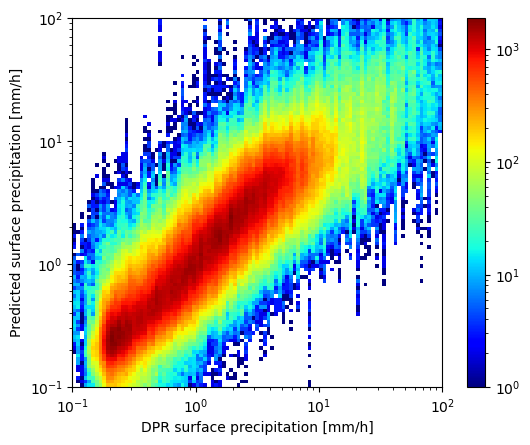

In [109]:
sfcRain_pred=0.1*(10**(y_pred_np)[:,2,4:-4,:]-1)
sfcRain_test=0.1*(10**(y_test)[:,2,4:-4,:]-1)
print(np.corrcoef(sfcRain_pred.flatten(),sfcRain_test.flatten()))
precipBins=np.logspace(-1,2,100)
ax=plt.figure()
h2d_rain=plt.hist2d(sfcRain_test.flatten(),sfcRain_pred.flatten(),bins=precipBins,norm=matplotlib.colors.LogNorm(),cmap='jet')
plt.xscale('log')
plt.yscale('log')
#set aspect ratio to be equal
ax.gca().set_aspect('equal', adjustable='box')
#ax.set_aspect('equal')
print(sfcRain_pred.mean(),sfcRain_test.mean())
plt.ylabel('Predicted surface precipitation [mm/h]')
plt.xlabel('DPR surface precipitation [mm/h]')
plt.colorbar(h2d_rain[3])
plt.savefig('PIAhybridKu_pred_vs_test.png')

In [110]:
#a=np.nonzero(sfcPrecip>0)
#plt.hist(sfcPrecip[a], bins=100)
sfcPrecipKu_test=sfcPrecipKu[ntrain:,:,]
sfcPrecip_test=sfcPrecip[ntrain:,:,:]
print(sfcPrecipKu_test.data.shape,sfcPrecip_test.data.shape)
a=np.nonzero(sfcPrecip_test.data>-1)
print(np.corrcoef(sfcPrecipKu_test.data[a],sfcPrecip_test.data[a]))
#print(np.corrcoef(sfcPrecipKu_test.data.flatten(),sfcRain_test.data.flatten()))

(32849, 16, 8) (32849, 16, 8)
[[1.         0.46517748]
 [0.46517748 1.        ]]
